In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.special import factorial

from scipy.stats import poisson

import pandas as pd

sns.set_style('whitegrid')

# metropolis 


In [12]:


def uniform_selection(X):
    return X[np.random.randint(0 , len(X))]
    
    
def bose( k , lamda = 0.71955125):
    return ( lamda**k )/ ( 1  + lamda )**(1 + k)


def pois(x, mu = 0.12403065):
    return poisson.pmf(x, mu=mu)

#metropolis sampler simulates a random sampling from an arbitrary distribution (p)
def metropolis_sampler(p, nsamples, X, x0 = 1):
    x = x0 # start somewhere
    
    samples = []

    for i in range(nsamples):
        trial = uniform_selection(X) # random neighbour from the proposal distribution
        acceptance = p(trial)/p(x)

        # accept the move conditionally
        if np.random.uniform() < acceptance:
            x = trial

        samples.append(x)
    return samples

Text(0.5, 1.0, 'histograma de datos reales para integración de 25ns')

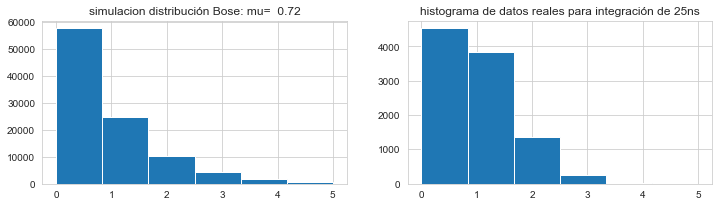

In [28]:
#bring data for 25ns 6v
df =pd.read_csv('resultados/25ns_6v/25ns_6v_conteo.txt')['0']

#Bose-Einstein simulation

X = np.arange(0,6)

f , ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,3))

ax[0].hist(metropolis_sampler(bose , 100000 ,X, 1) , bins= len(X)) #
ax[1].hist(df , bins = len(df.unique()))

ax[0].set_title('simulacion distribución Bose: mu=  0.72')
ax[1].set_title('histograma de datos reales para integración de 25ns')
#

Text(0.5, 1.0, 'conteo de oscuridad')

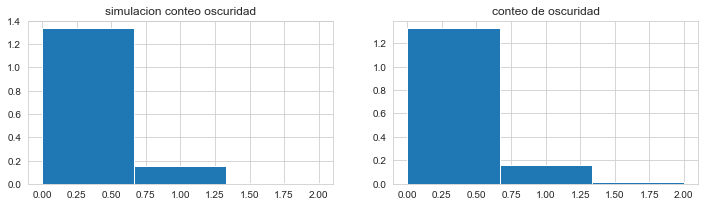

In [128]:
#dark occurences data
df_osc =pd.read_csv('resultados/conteo_oscuridad_50ohm/conteo_oscuridad_50ohm.txt')['0']

#Poisson simulation

X = np.arange(0,3)
samples = metropolis_sampler(pois , 10000 , X, 1)

f , ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,3))

ax[0].hist(samples , bins = len(X) , density = True )

ax[1].hist(df_osc , bins = len(X) , density = True )

ax[0].set_title('simulacion conteo oscuridad')
ax[1].set_title('conteo de oscuridad')


# metropolis sampler for 2 distributions 
this time, there maybe a sum of dark occurences and bose occurences. 
in this sampler, we simulate a mixture of 'dark' photon counts and 'true' photon counts.

In [86]:
def bose( x , lamda = 0.71955125):
    return ( lamda**x )/ ( 1  + lamda )**(1 + x)

def poisson(x , lamb = 0.12403065):
    return ( lamb**np.array(x) ) * np.exp(- lamb) / factorial(np.array(x))


In [121]:
def metropolis_sampler3(p1 , p2, nsamples, X1, X2,  x0 = 1, x02= 1):
    x1 = x0 # start somewhere
    x2 = x02
    
    samples = []

    for i in range(nsamples):
        trial1 = uniform_selection(X1) # random neighbour from the proposal distribution1
        trial2 = uniform_selection(X2) # random neighbour from the proposal distribution2
        
        acceptance1 = p1(trial1)/p1(x1) #acceptance prob depending on  distribution1
        acceptance2 = p2(trial2)/p2(x2) #acceptance prob depending on  distribution2

        # accept the move conditionally
        if np.random.uniform() < acceptance1:
            x1 = trial1
        if np.random.uniform() < acceptance2:
            x2 = trial2
        
        if x1 ==0:#accept the possibility of a dark occurance only if there are no true occurences
            x =  x1+x2 #the total sample is the sum of dark and bose occurences
        else:
            x = x1

        samples.append(x)
    return samples

Text(0.5, 1.0, 'histograma de datos reales para integración de 25ns')

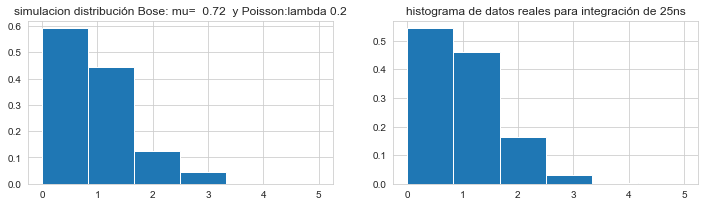

In [133]:
X1 = np.arange(0,6)
X2 = np.arange(0,4)

p1 = lambda x: poisson(x, 0.2 )#0.12403065)
p2 = lambda x: bose( x , lamda = 0.71955125)

samples = metropolis_sampler3(p1,p2 , 1000000 , X1,X2,  x0 = 1, x02= 1 )


f , ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (12,3))

ax[1].hist(df , bins = len(df.unique()), density = True)
ax[0].hist(samples , bins = len(np.unique(np.array(samples))), density=True)

ax[0].set_title('simulacion distribución Bose: mu=  0.72  y Poisson:lambda 0.2')
ax[1].set_title('histograma de datos reales para integración de 25ns')

